<h1 style="color: white; background: linear-gradient(43deg, #4158D0 0%, #d253c3 58%, #FB5959 100%); text-align: center; padding: 10px; box-shadow: 3px 3px 10px rgba(0,0,0,0.2); font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; border-radius: 5px; text-transform: capitalize;">
  Testing torchtools
</h1>

For visualizing purpose, instead of using unittesting, I will use Jupyter Notebook to test most of the code.

> <h2 id='0'>Table of Content</h2>

1. <a href='#import'>Importing packages</a>
2. <a href='#test_ImageFolder'>Testing Image Folder</a>
3. <a href='#is_tensor_correct'>is_tensor_correct</a>
4. plotting
   1. <a href='#plot_random_imgs'>plot_random_imgs</a>
   2. <a href='#plot_img_tensor'>plot_img_tensor</a>
   3. <a href='#plot_img_tensor'>plot_patchified_img</a>
   4. <a href='#plot_transformed_from_imgpath'>plot_transformed_from_imgpath</a>
   5. <a href='#plot_feature_maps_from_conv'>plot_feature_maps_from_conv</a>

<h1 id="importing" style="font-weight: 600; text-transform: capitalize; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color: #EA638C;">import packages</h1>
<a href='#0' style='background: #000; margin:0 auto; padding: 5px; border-radius: 5px;'>Back to ToC</a>

In [1]:
import os, sys, importlib
from pathlib import Path

NOTEBOOK_PATH = Path(os.getcwd())
sys.path.append(str(NOTEBOOK_PATH.parent.parent.parent.resolve()))
print('Notebook Path:', NOTEBOOK_PATH)
print('Path to my packages:', NOTEBOOK_PATH.parent.parent.parent.resolve())

import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from torchvision import transforms

# ~~~~~~~~ my pytools package ~~~~~~~~
from pytools import LogLevel, Logger

# ~~~~~~~~ torchtools package ~~~~~~~~
import pytorch.torchtools as tt

Notebook Path: /Users/jack/Desktop/playground/Python/pytorch/torchtools/test_notebooks
Path to my packages: /Users/jack/Desktop/playground/Python


Creating logger for the notebook.

In [2]:
logger = Logger(LogLevel.DEBUG)

<h1 id="test_ImageFolder" style="font-weight: 600; text-transform: capitalize; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color: #99E1D9;">Testing Image Folder</h1>
<a href='#0' style='background: #000; margin:0 auto; padding: 5px; border-radius: 5px;'>Back to ToC</a><br><br>

Define a transform for our ImageLoader

In [3]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),  # Resize images to 128x128
    transforms.ToTensor(),          # Convert image to PyTorch tensor
    # transforms.Normalize((0.1, 0.1, 0.5), (0.5, 0.5, 0.5)),  # Normalize with mean and std for 3 channels (R, G, B)
])

In [4]:
try:
    imagefolder = tt.gimmick.ImageFolder(
        "../../../datasets/animals-10/", "png",
    )
except ValueError as e:
    logger.error("Wrong targeted extension:\n", e)

 [ERROR]   Wrong targeted extension:
 Cannot find any image 


In [5]:
try:
    imagefolder = tt.ImageFolder(
        "../../../datasets/animals-10/", ".jpeg",
        transform=transform,
        check_consistency=True
    )
    len(imagefolder)
except ValueError as e:
    logger.error("Use auto check consistency. This should error.\n", e)

 [ERROR]   Use auto check consistency. This should error.
 Found 2 image files with extensions {'.png', '.jpg'} other than .jpeg in ../../../datasets/animals-10/ 


In [6]:
logger.info("ImageFolder correctly loaded.")

imagefolder = tt.ImageFolder(
    "../../../datasets/animals-10/", ".jpeg",
    transform=transform,
    check_consistency=False
)

 [INFO]    ImageFolder correctly loaded. 
ImageFolder initialized after 0.1277 seconds. Found: 24209 samples.


In [7]:
imagefolder.classes

['gallina',
 'ragno',
 'gatto',
 'farfalla',
 'mucca',
 'cavallo',
 'cane',
 'pecora',
 'scoiattolo',
 'elefante']

In [8]:
imagefolder.class_to_idx

{'gallina': 0,
 'ragno': 1,
 'gatto': 2,
 'farfalla': 3,
 'mucca': 4,
 'cavallo': 5,
 'cane': 6,
 'pecora': 7,
 'scoiattolo': 8,
 'elefante': 9}

<h1 id="is_tensor_correct" style="font-weight: 600; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color: #F4B400;">is_tensor_correct</h1>
<a href='#0' style='background: #000; margin:0 auto; padding: 5px; border-radius: 5px;'>Back to ToC</a>

In [9]:
print(type(imagefolder[0]))
print(imagefolder[0])

<class 'tuple'>
(tensor([[[0.7961, 0.7961, 0.8235,  ..., 0.3059, 0.2588, 0.2431],
         [0.7765, 0.7765, 0.7961,  ..., 0.2588, 0.2549, 0.2980],
         [0.7882, 0.8000, 0.8235,  ..., 0.1922, 0.2314, 0.3216],
         ...,
         [0.5922, 0.6078, 0.6314,  ..., 0.4902, 0.5569, 0.5373],
         [0.5804, 0.6000, 0.6039,  ..., 0.2667, 0.2784, 0.2157],
         [0.5529, 0.5804, 0.6039,  ..., 0.1569, 0.1569, 0.1451]],

        [[0.7765, 0.7765, 0.8039,  ..., 0.4078, 0.3569, 0.3373],
         [0.7569, 0.7569, 0.7765,  ..., 0.3529, 0.3451, 0.3882],
         [0.7686, 0.7804, 0.8039,  ..., 0.2745, 0.3137, 0.4039],
         ...,
         [0.5569, 0.5647, 0.5843,  ..., 0.4902, 0.5608, 0.5412],
         [0.5490, 0.5569, 0.5569,  ..., 0.2667, 0.2745, 0.2078],
         [0.5216, 0.5451, 0.5647,  ..., 0.1725, 0.1686, 0.1608]],

        [[0.6902, 0.6980, 0.7255,  ..., 0.5255, 0.4745, 0.4588],
         [0.6706, 0.6784, 0.7020,  ..., 0.4745, 0.4706, 0.5137],
         [0.6824, 0.7020, 0.7294,  ..., 0

In [10]:
importlib.reload(tt)
tt.DaVinci.is_tensor_correct(imagefolder[0][0], 'RGB')

True

<h1 id="plot_random_imgs" style="font-weight: 600; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color: #EA638C;">plot_random_imgs</h1>
<a href='#0' style='background: #000; margin:0 auto; padding: 5px; border-radius: 5px;'>Back to ToC</a>

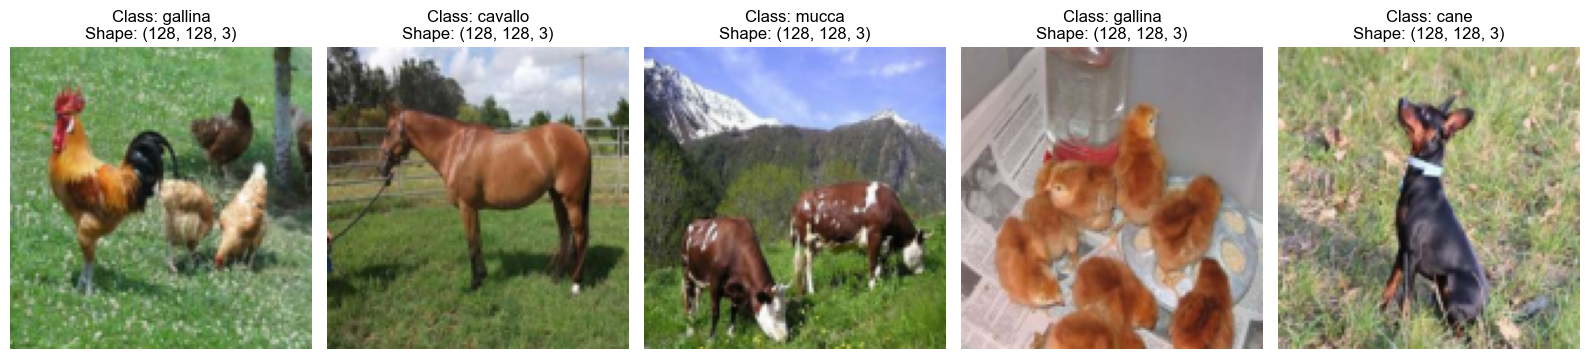

In [11]:
importlib.reload(tt)
tt.DaVinci.plot_random_imgs(imagefolder, n=5, verbose=False)

<h1 id="plot_img_tensor" style="font-weight: 600; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color: #99E1D9;">plot_img_tensor</h1>
<a href='#0' style='background: #000; margin:0 auto; padding: 5px; border-radius: 5px;'>Back to ToC</a>

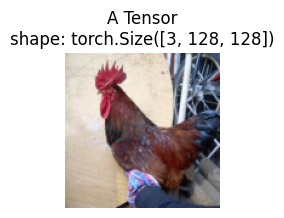

In [12]:
tt.DaVinci.plot_img_tensor(imagefolder[0][0], figsize=(2,3))

<h1 id="plot_patchified_img" style="font-weight: 600; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color: #F4B400;">plot_patchified_img</h1>
<a href='#0' style='background: #000; margin:0 auto; padding: 5px; border-radius: 5px;'>Back to ToC</a>

Rows: 8 | Column: 8
Size (w * h): 16 * 16
Total patches: 64


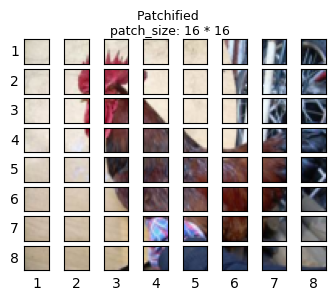

In [13]:
tt.DaVinci.plot_patchified_img(
    imagefolder[0][0], 
    16, 16, 
    figsize=(4, 3), 
    verbose=True
)

<h1 id="plot_transformed_from_imgpath" style="font-weight: 600; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color: #EA638C;">plot_transformed_from_imgpath</h1>
<a href='#0' style='background: #000; margin:0 auto; padding: 5px; border-radius: 5px;'>Back to ToC</a>

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[<Figure size 600x300 with 2 Axes>, <Figure size 600x300 with 2 Axes>]

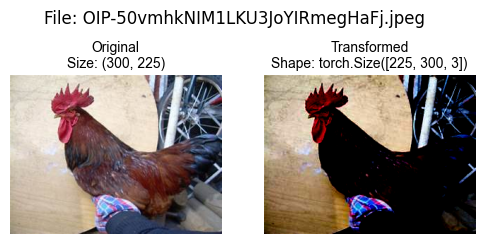

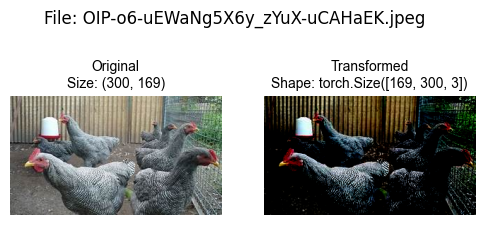

In [14]:
importlib.reload(tt)
weird_tf_pipeline = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5]) # Normalizing to [-1, 1] range for all channels
])
tt.DaVinci.plot_transformed_from_imgpath(imagefolder.paths[:2], weird_tf_pipeline)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


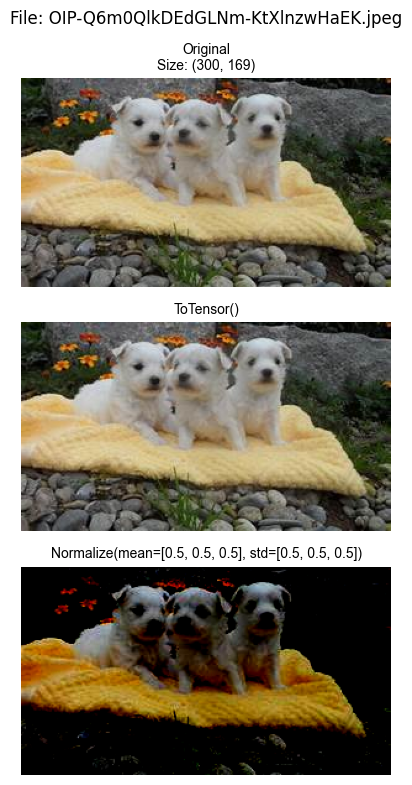

In [15]:
importlib.reload(tt)
tt.DaVinci.plot_transformed_from_imgpath_progressive(imagefolder.paths[16500], weird_tf_pipeline)

<h1 id="plot_feature_maps_from_conv" style="font-weight: 600; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color: #99E1D9;">plot_feature_maps_from_conv</h1>
<a href='#0' style='background: #000; margin:0 auto; padding: 5px; border-radius: 5px;'>Back to ToC</a>

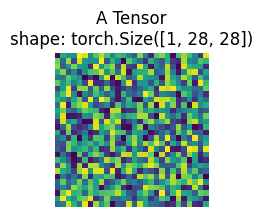

In [16]:
importlib.reload(tt)
# Sample input: 8 grayscale images of size 28x28 (like MNIST)
sample_inputs = torch.rand(8, 1, 28, 28)
tt.painters.DaVinci.plot_img_tensor(sample_inputs[0], mode='grey', figsize=(2, 2))

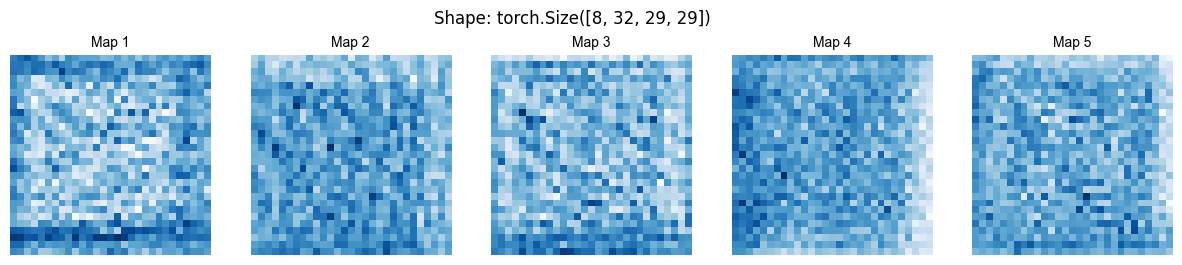

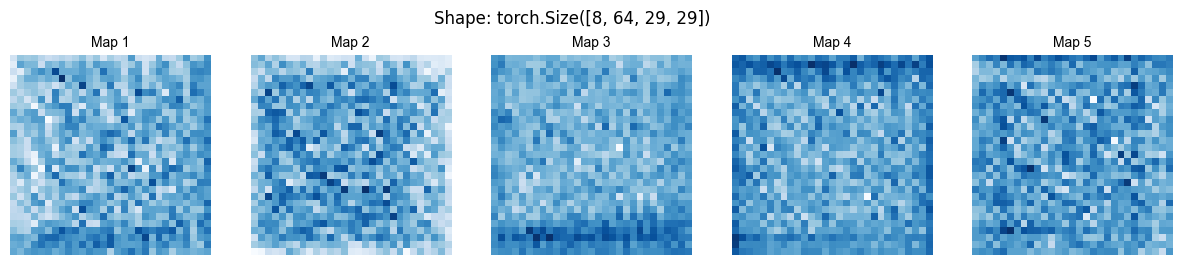

In [17]:
importlib.reload(tt)

class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=32, kernel_size=10, stride=1, padding=5)
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = nn.ReLU()(self.conv1(x))
        x = nn.MaxPool2d(kernel_size=2)(x)
        x = nn.ReLU()(self.conv2(x))
        x = nn.MaxPool2d(kernel_size=2)(x)
        x = x.view(x.size(0), -1)
        x = nn.ReLU()(self.fc1(x))
        x = self.fc2(x)
        return x

# Pass through the CNN
model = SimpleCNN()
with torch.no_grad():
    model.eval()
    _ = model(sample_inputs)

    fmap_c1 = model.conv1(sample_inputs)
    fmap_c2 = model.conv2(fmap_c1)
    
    tt.Mondrian.plot_feature_maps_from_conv(feature_maps=fmap_c1, num_maps=5)
    tt.Mondrian.plot_feature_maps_from_conv(feature_maps=fmap_c2, num_maps=5)

<h1 id="plot_training_curves" style="font-weight: 600; font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; color: #99E1D9;">plot_training_curves</h1>
<a href='#0' style='background: #000; margin:0 auto; padding: 5px; border-radius: 5px;'>Back to ToC</a>

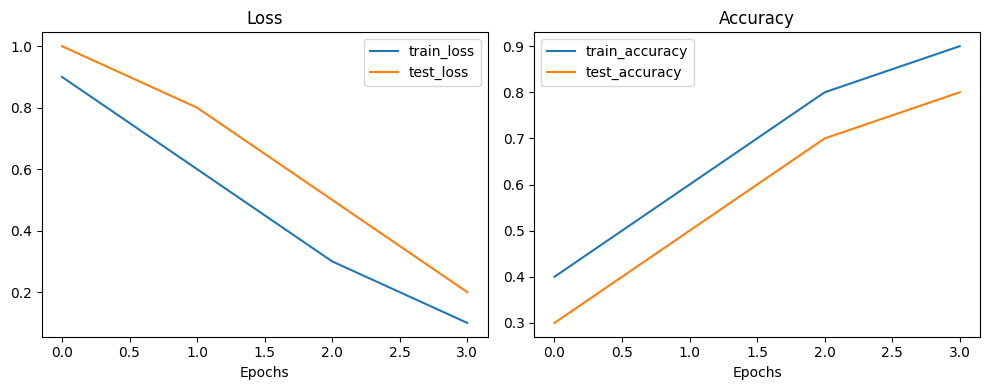

In [18]:
results = {
    "train_loss": [0.9, 0.6, 0.3, 0.1],
    "train_acc":  [0.4, 0.6, 0.8, 0.9],
    "test_loss":  [1.0, 0.8, 0.5, 0.2],
    "test_acc":   [0.3, 0.5, 0.7, 0.8]
}
tt.Mondrian.plot_training_curves(results)